# Cargue inicial

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,MaxAbsScaler,Normalizer

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')

In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [ ]:
# Realizado en el notebook de EDA

# Revisión de duplicados

In [5]:
duplicados = df.duplicated().sum()
print(df.duplicated().sum())

0


In [6]:
duplicados = df.duplicated(subset=['PassengerId']).sum()
print(df.duplicated(subset=['PassengerId']).sum())

0


In [8]:
duplicados = df[df.duplicated()]
duplicados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# df.drop_duplicates()

# Revisión de nulos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
nulos = df.isnull().sum()
nulos

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#df2 = df   cualquier cambio afecta al dataframe(df) original
#df2 = df.copy()   este crea una copia aislada

In [14]:
pct_nulos = df.isnull().mean()*100
pct_nulos

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Si % de nulos <5% : Eliminar

Si % 5% y el 30% : Imputación de datos

Si es 30%: Analizar a detalle que tanto aporta

In [15]:
df_age_analysis_mean = df.copy()
df_age_analysis_median = df.copy()

In [36]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [18]:
df_age_analysis_mean['Age'] = df_age_analysis_mean['Age'].fillna(df_age_analysis_mean['Age'].mean())

In [27]:
df_age_analysis_mean.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q


In [21]:
df_age_analysis_median['Age'] = df_age_analysis_median['Age'].fillna(df_age_analysis_median['Age'].median())

In [28]:
df_age_analysis_median.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


In [29]:
df_median_agrup = df.copy()
df_median_agrup['Age'] = df_median_agrup['Age'].fillna(df_median_agrup.groupby(['Pclass','Sex'])['Age'].transform('median'))
df_median_agrup.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q


In [33]:
df_knn = df.copy()
features_columns = ['Age', 'Pclass']
imputer = KNNImputer(n_neighbors=6)
df_knn[features_columns] = imputer.fit_transform(df_knn[features_columns])
df_knn.head(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3.0,"Moran, Mr. James",male,21.833333,0,0,330877,8.4583,NaN,Q


In [34]:
df_mode = df.copy()
df_mode['Embarked'] = df_mode['Embarked'].fillna(df_mode['Embarked'].mode()[0])
df_mode.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Tratamiento de outliers

In [ ]:
# Análisis de Edad

In [39]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < limite_inferior) | (df['Age'] > limite_superior)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


<Axes: xlabel='Age'>

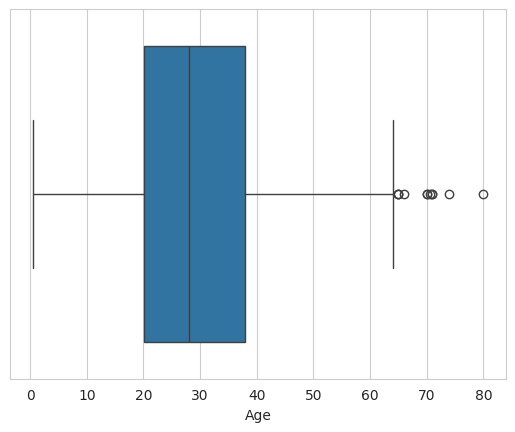

In [40]:
sns.set_style('whitegrid')
sns.boxplot(x=df['Age'])

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 3 * IQR
limite_superior = Q3 + 3 * IQR

outliers = df[(df['Fare'] < limite_inferior) | (df['Fare'] > limite_superior)]
outliers

In [46]:
# Z - score
df_zcore = df.copy()
media = df['Age'].mean()
desviacion_estandar = df['Age'].std()

df_zcore['z_score'] = (df_zcore['Age'] - media) / desviacion_estandar
df_zcore.head(10)

outliers = df_zcore[df_zcore['z_score'] > 3]
outliers


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,z_score
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S,3.462699
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S,3.049660


<Axes: xlabel='Fare'>

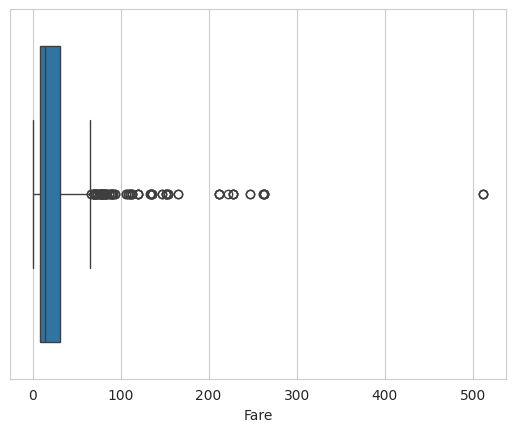

In [42]:
sns.boxplot(x=df['Fare'])

#  Encode de variables categoricas

In [50]:
df_encode = df.copy()
df_encode['Pclass'] = df_encode['Pclass'].astype(str)

encode = OrdinalEncoder(categories=[["3","2","1"]])
df_encode['Pclass_new'] = encode.fit_transform(df_encode[['Pclass']])
df_encode.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2.0
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1.0


In [55]:
df_dummies = df.copy()
df_dummies = pd.get_dummies(df_dummies, columns=['Sex'], drop_first=True)
df_dummies.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,False


In [53]:
df_label = df.copy()
label = LabelEncoder()
df_label['Sex_new'] = label.fit_transform(df_label['Sex'])
df_label.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [54]:
df_label = df.copy()
label = LabelEncoder()
df_label['Embarked_new'] = label.fit_transform(df_label['Embarked'])
df_label.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


# Transformaciones, normalizacion de datos

In [57]:
scaler = MinMaxScaler()
df_scaler = df.copy()
df_scaler[['Age', 'Fare']] = scaler.fit_transform(df_scaler[['Age', 'Fare']])
df_scaler.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,0.016510,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.673285,0,0,17463,0.101229,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,0.019854,3,1,349909,0.041136,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.334004,0,2,347742,0.021731,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.170646,1,0,237736,0.058694,NaN,C


In [58]:
scaler = StandardScaler()
df_scaler = df.copy()
df_scaler[['Age', 'Fare']] = scaler.fit_transform(df_scaler[['Age', 'Fare']])
df_scaler.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,-0.478116,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,1.674039,0,0,17463,0.395814,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,-1.908136,3,1,349909,-0.224083,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,-0.185937,0,2,347742,-0.424256,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,-1.081480,1,0,237736,-0.042956,NaN,C


In [59]:
scaler = MaxAbsScaler()
df_scaler = df.copy()
df_scaler[['Age', 'Fare']] = scaler.fit_transform(df_scaler[['Age', 'Fare']])
df_scaler.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.2750,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.4750,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.4375,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.4375,0,0,373450,0.015713,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,0.016510,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.6750,0,0,17463,0.101229,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,0.0250,3,1,349909,0.041136,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.3375,0,2,347742,0.021731,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.1750,1,0,237736,0.058694,NaN,C
